# Logistic Regression

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

titanic_data = pd.read_csv('titanic.csv')
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
print("Number of passengers in original data:" +str(len(titanic_data.index)))

Number of passengers in original data:891


### Analyzing Data

<AxesSubplot: xlabel='Survived', ylabel='count'>

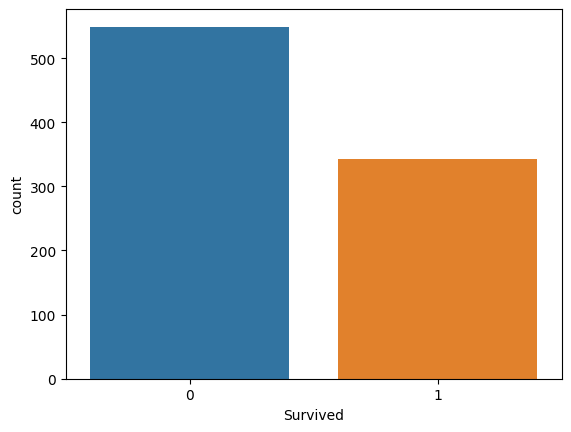

In [5]:
sns.countplot(x="Survived", data = titanic_data)

<AxesSubplot: xlabel='Survived', ylabel='count'>

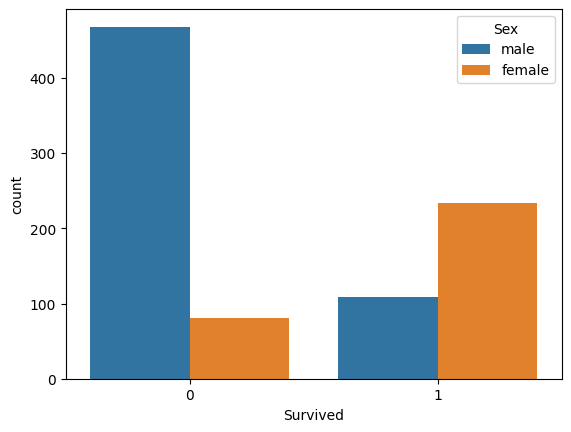

In [6]:
sns.countplot(x ="Survived", hue="Sex", data = titanic_data)

<AxesSubplot: xlabel='Survived', ylabel='count'>

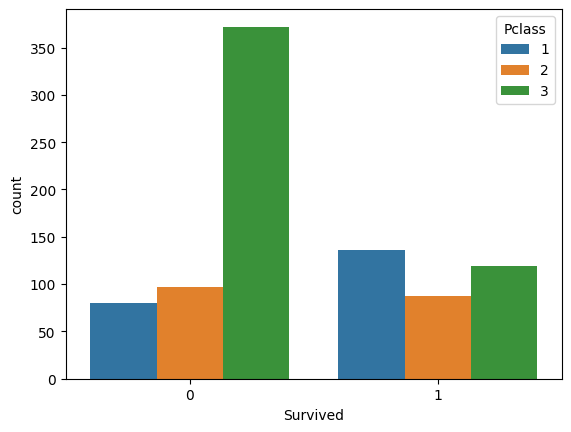

In [7]:
sns.countplot(x ="Survived", hue="Pclass", data = titanic_data)

<AxesSubplot: ylabel='Frequency'>

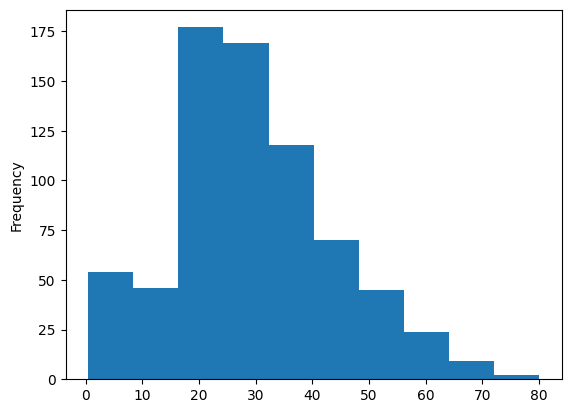

In [8]:
titanic_data["Age"].plot.hist()

<AxesSubplot: ylabel='Frequency'>

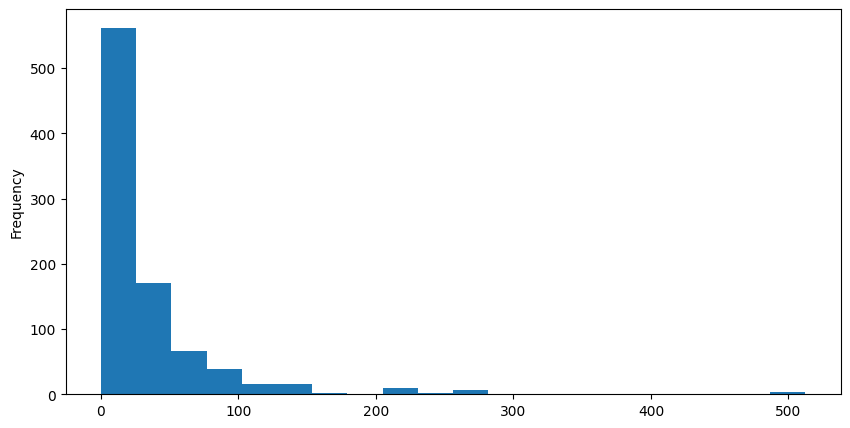

In [14]:
titanic_data["Fare"].plot.hist(bins=20, figsize= (10,5))

In [15]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot: xlabel='SibSp', ylabel='count'>

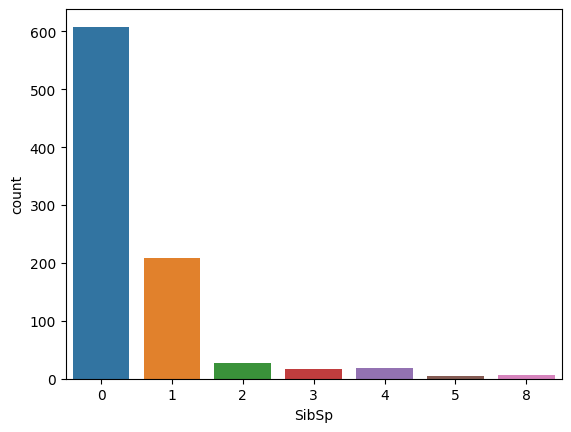

In [16]:
sns.countplot(x="SibSp", data= titanic_data)

## Data Wrangling

In [18]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: >

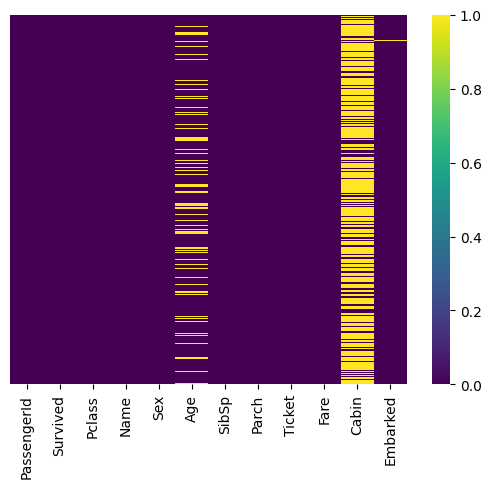

In [22]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap="viridis")

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

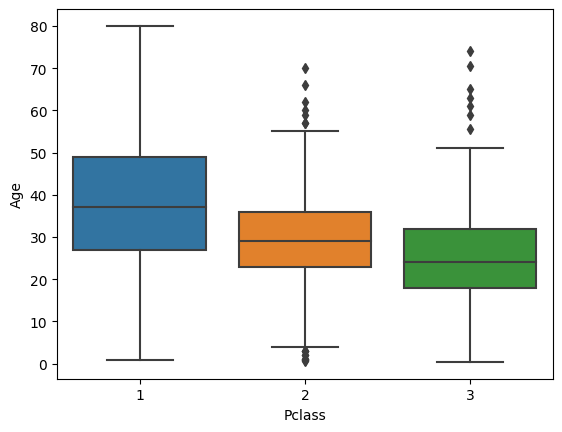

In [24]:
sns.boxplot(x="Pclass", y="Age", data=titanic_data)

In [26]:
titanic_data.head((5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
titanic_data.drop("Cabin", axis=1, inplace=True)

KeyError: "['Cabin'] not found in axis"

In [32]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [33]:
titanic_data.dropna(inplace=True)

<AxesSubplot: >

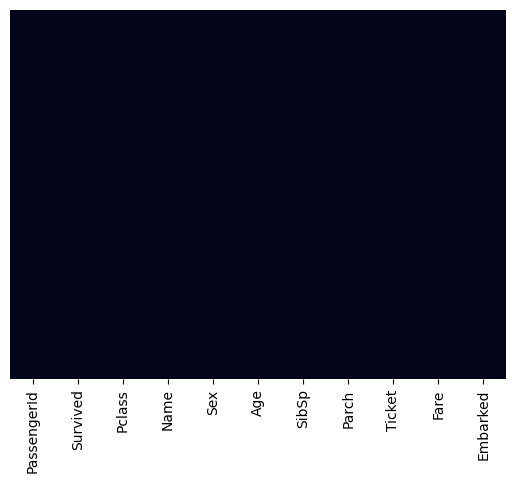

In [34]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

In [35]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [36]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [39]:
sex= pd.get_dummies(titanic_data['Sex'], drop_first=True)
sex.head((5))

,male
0,1
1,0
2,0
3,0
4,1


In [41]:
embark = pd.get_dummies(titanic_data["Embarked"], drop_first=True)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [42]:
Pcl = pd.get_dummies(titanic_data["Pclass"], drop_first=True)
Pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [43]:
titanic_data = pd.concat([titanic_data,sex,embark,Pcl], axis= 1)

In [44]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [49]:
titanic_data.drop(['Sex','Embarked', 'PassengerId', 'Name','Ticket'], axis=1, inplace=True)

KeyError: "['Sex', 'Embarked', 'PassengerId', 'Name', 'Ticket'] not found in axis"

In [50]:
titanic_data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [51]:
titanic_data.drop('Pclass', axis=1, inplace= True)

### Train Data

In [52]:
X = titanic_data.drop("Survived", axis=1)
y = titanic_data["Survived"]

In [55]:
import sklearn
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [57]:
from sklearn.linear_model import LogisticRegression

In [63]:
logmodel = LogisticRegression(solver='lbfgs',max_iter=10000)

In [70]:
logmodel.fit(X_train.values, y_train)

LogisticRegression(max_iter=10000)

In [75]:
predictions = logmodel.predict(X_test.values)

In [76]:
from sklearn.metrics import classification_report

In [77]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.80      0.81      0.81       126\n           1       0.72      0.72      0.72        88\n\n    accuracy                           0.77       214\n   macro avg       0.76      0.76      0.76       214\nweighted avg       0.77      0.77      0.77       214\n'

In [78]:
from sklearn.metrics import confusion_matrix

In [79]:
confusion_matrix(y_test, predictions)

array([[102,  24],
       [ 25,  63]])

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
accuracy_score(y_test, predictions)

0.7710280373831776

# Decision Tree

In [42]:
# sanple dataset
# the first two colums are features
# the last column is a label

training_data = pd.read_csv('fruit.csv')
training_data.head(10)

,Color,Diameter,Label
0,Green,5,Mango
1,Yellow,1,Grape
2,Red,2,Mango
3,Red,5,Mango
4,Yellow,3,Lemon
5,Yellow,5,Lemon
6,Green,3,Grape
7,Red,2,Grape
8,Yellow,3,Mango
9,Yellow,4,Lemon


In [37]:
training_data_set = []
for index, row in training_data.iterrows():
    training_data_set.append([row[0], row[1], row[2]])

training_data_set

[['Green', 5, 'Mango'],
 ['Yellow', 1, 'Grape'],
 ['Red', 2, 'Mango'],
 ['Red', 5, 'Mango'],
 ['Yellow', 3, 'Lemon'],
 ['Yellow', 5, 'Lemon'],
 ['Green', 3, 'Grape'],
 ['Red', 2, 'Grape'],
 ['Yellow', 3, 'Mango'],
 ['Yellow', 4, 'Lemon'],
 ['Yellow', 1, 'Lemon'],
 ['Green', 4, 'Mango'],
 ['Yellow', 3, 'Mango'],
 ['Green', 1, 'Grape'],
 ['Red', 3, 'Grape'],
 ['Yellow', 2, 'Lemon'],
 ['Red', 2, 'Grape'],
 ['Green', 4, 'Grape'],
 ['Green', 5, 'Grape'],
 ['Yellow', 4, 'Mango'],
 ['Yellow', 3, 'Lemon'],
 ['Yellow', 4, 'Lemon'],
 ['Red', 1, 'Grape'],
 ['Yellow', 3, 'Mango'],
 ['Red', 1, 'Grape'],
 ['Yellow', 4, 'Mango'],
 ['Green', 3, 'Mango'],
 ['Green', 5, 'Grape'],
 ['Green', 4, 'Grape'],
 ['Yellow', 1, 'Lemon'],
 ['Green', 2, 'Lemon'],
 ['Green', 1, 'Mango'],
 ['Yellow', 1, 'Lemon'],
 ['Green', 1, 'Grape'],
 ['Yellow', 2, 'Mango'],
 ['Yellow', 1, 'Grape'],
 ['Red', 4, 'Mango'],
 ['Yellow', 4, 'Grape'],
 ['Red', 2, 'Grape'],
 ['Red', 4, 'Mango'],
 ['Green', 2, 'Lemon'],
 ['Green', 3, 'Man

In [27]:
header = ["color","diameter", "label"]

Find the unique values for a column in a dataset

In [9]:
def unique_vals(rows, col):
    return set([row[col] for row in rows])

In [38]:
unique_vals(training_data_set,0)

{'Green', 'Red', 'Yellow'}

Counts the number of each type of example in the dataset

In [11]:
def class_counts(rows):
    counts = {} # a dictionary of Label
    for row in rows:
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] +=1
    return counts
    

In [39]:
class_counts(training_data_set)

{'Mango': 87, 'Grape': 88, 'Lemon': 62}

Test if a value is numeric or not

In [12]:
def is_numeric(value):
    return isinstance(value, int) or isinstance(value, float)

In [18]:
is_numeric("Red")

False

A Question is used to partition a dataset.

This class just records a 'colums number' (e.g., 0 for Color) and a 'column value' (e.g., Green).
The 'match' method is used to compare the feature in an example to the feature value stored in the question.

In [19]:
class Question:
    
    def __init__(self, column, value):
        self.column = column
        self.value = value
        
    def match(self, example):
        # Compare the feature value in an example to the
        # feature value in this question
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value
        
    def __repr__(self):
        # This is just a helper method to print
        # the question in a readable format.
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (
            header[self.column], condition, str(self.value))

Partition a dataset

In [21]:
def partition(rows, question):
    # For each row in the dataset, check if it matches the question.
    # if so, add ot to 'true rows', otherwise, add it to 'false rows'.
    
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows

In [43]:
true_rows, false_rows = partition(training_data_set, Question(0,'Red'))
true_rows
false_rows

[['Green', 5, 'Mango'],
 ['Yellow', 1, 'Grape'],
 ['Yellow', 3, 'Lemon'],
 ['Yellow', 5, 'Lemon'],
 ['Green', 3, 'Grape'],
 ['Yellow', 3, 'Mango'],
 ['Yellow', 4, 'Lemon'],
 ['Yellow', 1, 'Lemon'],
 ['Green', 4, 'Mango'],
 ['Yellow', 3, 'Mango'],
 ['Green', 1, 'Grape'],
 ['Yellow', 2, 'Lemon'],
 ['Green', 4, 'Grape'],
 ['Green', 5, 'Grape'],
 ['Yellow', 4, 'Mango'],
 ['Yellow', 3, 'Lemon'],
 ['Yellow', 4, 'Lemon'],
 ['Yellow', 3, 'Mango'],
 ['Yellow', 4, 'Mango'],
 ['Green', 3, 'Mango'],
 ['Green', 5, 'Grape'],
 ['Green', 4, 'Grape'],
 ['Yellow', 1, 'Lemon'],
 ['Green', 2, 'Lemon'],
 ['Green', 1, 'Mango'],
 ['Yellow', 1, 'Lemon'],
 ['Green', 1, 'Grape'],
 ['Yellow', 2, 'Mango'],
 ['Yellow', 1, 'Grape'],
 ['Yellow', 4, 'Grape'],
 ['Green', 2, 'Lemon'],
 ['Green', 3, 'Mango'],
 ['Yellow', 4, 'Mango'],
 ['Yellow', 5, 'Grape'],
 ['Yellow', 3, 'Lemon'],
 ['Yellow', 3, 'Mango'],
 ['Yellow', 2, 'Mango'],
 ['Yellow', 2, 'Grape'],
 ['Yellow', 5, 'Mango'],
 ['Yellow', 3, 'Mango'],
 ['Green', 1, 

Calculate the Gini Impurity for a list of rows

In [44]:
def gini(rows):
    counts = class_counts(rows)
    impurity = 1
    for label in counts:
        prob_of_label = counts[label]/float(len(rows))
        impurity -= prob_of_label**2
    return impurity

In [45]:
gini(training_data_set)

0.6589399846890633

In [46]:
def info_gain(left, right, current_uncertainty):
    # The current uncertainty of the starting node, minus
    # the weighted impurity of two child nodes.
    p = float(len(left))/ (len(left) + len(right))
    return current_uncertainty - p*gini(left) - (1 - p) * gini(right)

In [47]:
# Demo
# calculate the actual uncertainty of our training data

current_uncertainty = gini(training_data_set)
true_rows, false_rows = partition(training_data_set, Question(0,'Red'))
info_gain(true_rows, false_rows, current_uncertainty)

0.0006040200424577424

In [55]:
def find_best_split(rows):
    """find the best question to ask by iterating over every feature/value and calculating the information gain"""
    best_gain = 0 #keep track of the best information gain
    best_question = None #keep train of the feature / value that produced it
    current_uncertainty = gini(rows)
    n_features = len(rows[0]) -1 # number of columns
    for col in range(n_features): # for each feature
        values = set([row[col] for row in rows]) # unique values in column
        
        for val in values:  # for each value
            question = Question(col, val)
            
            # try splitting the dataset
            true_rows, false_rows = partition(rows, question)
            
            # skip this split if it does not divide the dataset
            if len(true_rows) == 0 or len(false_rows) ==0:
                continue
            # Calculate the information gain from this split 
            gain = info_gain(true_rows, false_rows, current_uncertainty)
            
            # We actually can use '>' instead of '>=' here
            if gain >= best_gain:
                best_gain, best_question = gain, question
        return best_gain, best_question

In [56]:
best_gain, best_question = find_best_split(training_data_set)
best_gain
best_question

Is color == Yellow?

In [57]:
class Leaf:
    """A Leaf node classifies data.
    
    This holds a dictionnary of classes(e.g., "Mango")-> number of times
    it appears in the rows from the training data that reach this leaf."""
    
    def __init__(self, rows):
        self.predictions = class_counts(rows)

In [58]:
class Decision_Node:
    """A Decision Node asks a question.
    
    This holds a reference to a question, and to the two child nodes."""
    
    def __init__(self,
                question,
                true_branch,
                false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

In [67]:
def build_tree(rows):
    """Builds the tree."""
    
    # Try partitioning the dataset on each of the unique attribute,
    # calculate the information gain,
    # and return the question that produces the highest gain.
    gain, question = find_best_split(rows)
    
    # Base case: no further info gain
    # Since we can ask no further questions,
    # we will return a leaf.
    if gain == 0:
        return Leaf(rows)
    # If we reach here, we have found a useful feature / value
    # to partition on.
    true_rows, false_rows = partition(rows, question)
    
    # Recursively build the true branch.
    true_branch = build_tree(true_rows)
    
    # Recursively build the false branch.
    false_branch = build_tree(false_rows)
    
    # Return a Question node.
    # This records the best feature / value to ask at this point,
    # as well as the branches to follow depending on the answer.
    return Decision_Node(question, true_branch, false_branch)

In [60]:
def print_tree(node, spacing = ""):
    """Tree printing function"""
    
    # Base case: we've reached a Leaf
    if isinstance(node, Leaf):
        print(spacing + "Predict", node.predictions)
        return
    
    # Print the question at this node
    print(spacing + str(node.question))
    
    # Call this function recursively on the true branch
    print(spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")
    
     # Call this function recursively on the false branch
    print(spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")
    

In [61]:
def classify(row, node):
    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        return node.predictions
    
    # Decide whether to follow the true-branch or the false-branch.
    # Compare the feature /value stored in the node,
    # to the example we're considering.
    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)

In [62]:
def print_leaf(counts):
    """Print the predictions at leaf."""
    total = sum(counts.values())*1.0
    probs = {}
    for label in counts.keys():
        probs[label] = str(int(counts[label] / total*100)) + "%"
    return probs

In [70]:
# Demo
# Printing that is a bit nicer
# print_Leaf(classify(training_data_set[0], my_tree))

# On the second example, the confidence is lower
# print_Leaf(classify(training_data_set[1], my_tree))

if __name__ == '__main__':
    my_tree = build_tree(training_data_set)
    
    print(my_tree)
    
    # Evaluate
    testing_data = pd.read_csv('fruit_test.csv')
    testing_data_set = []
    for index, row in testing_data.iterrows():
        testing_data_set.append([row[0], row[1], row[2]])
    
    for row in testing_data_set:
        print("Actual: %s. Predicted: %s"%
             (row[-1], print_leaf(classify(row, my_tree))))

Actual: Mango. Predicted: {'Mango': '32%', 'Grape': '40%', 'Lemon': '27%'}
Actual: Mango. Predicted: {'Grape': '33%', 'Lemon': '25%', 'Mango': '41%'}
Actual: Mango. Predicted: {'Mango': '32%', 'Grape': '40%', 'Lemon': '27%'}
Actual: Grape. Predicted: {'Mango': '33%', 'Grape': '39%', 'Lemon': '26%'}
Actual: Grape. Predicted: {'Mango': '33%', 'Grape': '39%', 'Lemon': '26%'}
Actual: Lemon. Predicted: {'Grape': '33%', 'Lemon': '25%', 'Mango': '41%'}
Actual: Grape. Predicted: {'Mango': '33%', 'Grape': '39%', 'Lemon': '26%'}
Actual: Mango. Predicted: {'Mango': '33%', 'Grape': '39%', 'Lemon': '26%'}
Actual: Mango. Predicted: {'Mango': '32%', 'Grape': '40%', 'Lemon': '27%'}
Actual: Lemon. Predicted: {'Mango': '33%', 'Grape': '39%', 'Lemon': '26%'}
Actual: Grape. Predicted: {'Mango': '33%', 'Grape': '39%', 'Lemon': '26%'}
Actual: Lemon. Predicted: {'Mango': '32%', 'Grape': '40%', 'Lemon': '27%'}
Actual: Grape. Predicted: {'Mango': '32%', 'Grape': '40%', 'Lemon': '27%'}
Actual: Grape. Predicted:

# Anomaly Detection Algorithm

### Anomaly detection algorithm using KMeans clustering and Elliptic Envelope.

In [71]:
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope

In [75]:
# data: array-like, shape(n_samples, n_features)
# the input data to train the model.

#n_clusters: The number of clusters to use in the KMeans model
#contamination: The amount of contamination of the data set,
#i.e. the proportion of outliers in the data set. Used when fitting the EllipticEnvelope
# This function returns a boolean array indicating whether a sample is an anomaly (True) or not (False)
def anomaly_detection(data_set, n_clusters = 10, contamination = 0.1):
    # fit KMeans model to data_set
    kmeans = KMeans(n_clusters= n_clusters)
    kmeans. fit(data_set)
    
    # assign each sample to its closest cluster
    cluster_labels = kmeans.predict(data_set)
    
    # fit EllipticEnveloppe model to each cluster
    anomalies = np.zeros(data_set.shape[0], dtype= bool)
    for i in range(n_clusters):
        cluster = data_set[cluster_labels == i]
        clf = EllipticEnvelope(contamination= contamination)
        clf.fit(cluster)
        anomalies[cluster_labels == i] = clf.predict(cluster) == -1

    return anomalies

In [76]:
# generate some example data_set
np.random.seed(0)
n_samples = 1000
data_set = np.random.normal(size=(n_samples,1))

In [77]:
# add some anomalies
data_set[:10] = np.random.normal(loc= 10, size=(10,1))

In [80]:
# run anomaly detection
anomalies = anomaly_detection(data_set)

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


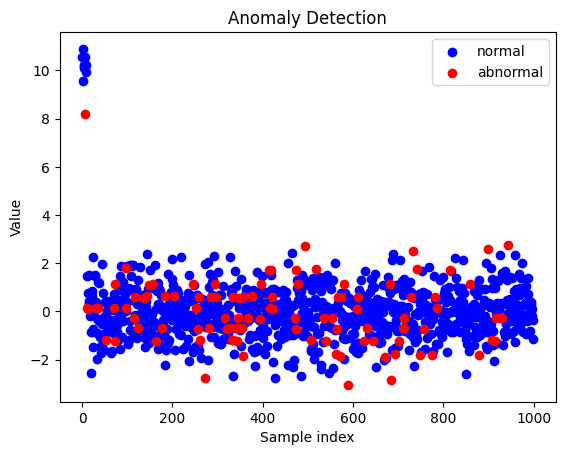

In [83]:
# plot the data with the anomalies
df = pd.DataFrame(data, columns=["value"])
df["anomaly"] = anomalies

normal = df[df["anomaly"] == False]
abnormal = df[df["anomaly"] == True]

fig, ax = plt.subplots()
ax.scatter(normal.index, normal["value"], c = "blue", label = "normal")
ax.scatter(abnormal.index, abnormal["value"], c ="red", label= "abnormal")
ax.legend()
ax.set_title("Anomaly Detection")
ax.set_xlabel("Sample index")
ax.set_ylabel("Value")
plt.show()

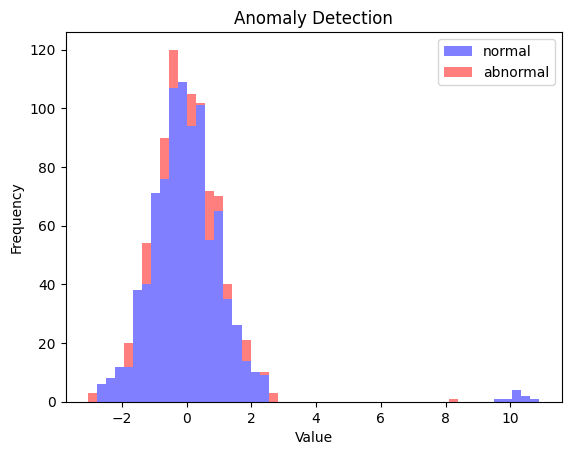

In [86]:
# plot the data and the anomalies using an histogram
df = pd.DataFrame(data, columns=["value"])
df["anomaly"] = anomalies

normal = df[df["anomaly"]==False]["value"]
abnormal = df[df["anomaly"]==True]["value"]
fig, ax = plt.subplots()
ax.hist([normal, abnormal], bins = 50, color=["blue", "red"], stacked= True, alpha = 0.5, label=["normal", "abnormal"])
ax.legend()
ax.set_title("Anomaly Detection")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
plt.show()

### Anomaly detection algorithm using the Local Outlier Factor(LOF). 

In [88]:
from sklearn.neighbors import LocalOutlierFactor

In [101]:
# data: array-like, shape(n_samples, n_features)
# the input data to train the model.

#n_clusters: The number of clusters to use in the KMeans model
#contamination: The amount of contamination of the data set,
#i.e. the proportion of outliers in the data set. Used when fitting the LocalOutlierFactor
#n_neighbors: The number of neighbors to use when fitting the LocalOutlierFactor

# This function returns a boolean array indicating whether a sample is an anomaly (True) or not (False)

def anomaly_detection(data_set, contamination= 0.1, n_neighbors=20):
    # fit the local outlier factor to data set
    clf = LocalOutlierFactor(contamination= contamination, n_neighbors= n_neighbors)
    clf.fit(data_set)
    
    # predict anomalies
    anomalies = clf.fit_predict(data_set) == -1
    
    return anomalies

In [102]:
# generate some example data
np.random.seed(0)
n_samples = 1000
data_set = np.random.normal(size=(n_samples,1))

# add some anomalies
data_set[:10] = np.random.normal(loc = 10, size=(10,1))

In [103]:
# run the anomaly detection
anomalies = anomaly_detection(data_set)

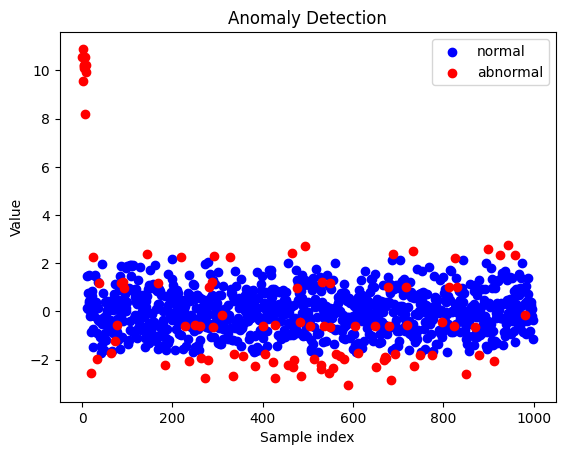

In [104]:
# plot the data and anomalies
df = pd.DataFrame(data, columns=["value"])
df["anomaly"] = anomalies

normal = df[df["anomaly"] == False]
abnormal = df[df["anomaly"] == True]

fig, ax = plt.subplots()
ax.scatter(normal.index, normal["value"], c = "blue", label = "normal")
ax.scatter(abnormal.index, abnormal["value"], c ="red", label= "abnormal")
ax.legend()
ax.set_title("Anomaly Detection")
ax.set_xlabel("Sample index")
ax.set_ylabel("Value")
plt.show()

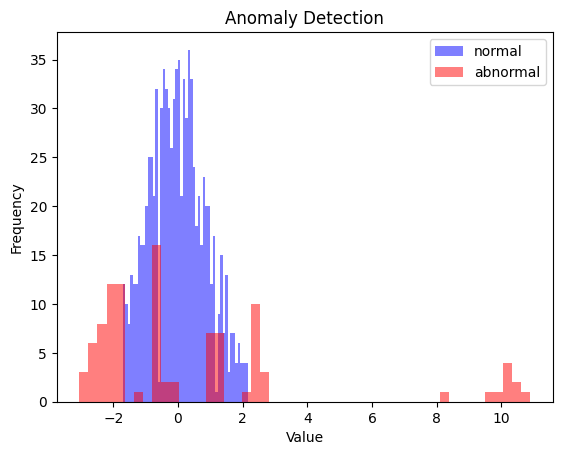

In [106]:
# plot the data and anomalies using the an histogram
normal =   data_set[anomalies == False]
abnormal = data_set[anomalies == True]

fig, ax = plt.subplots()
ax.hist(normal, bins =50, color="blue", alpha=0.5, label ="normal")
ax.hist(abnormal, bins =50, color="red", alpha=0.5, label ="abnormal")
ax.legend()
ax.set_title("Anomaly Detection")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
plt.show()